age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



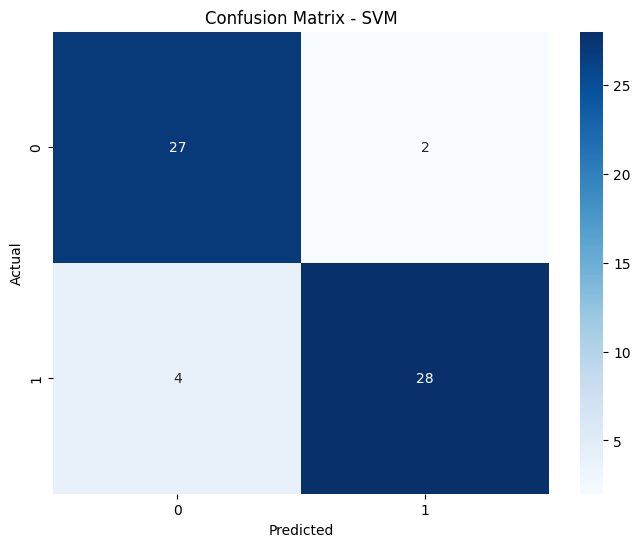

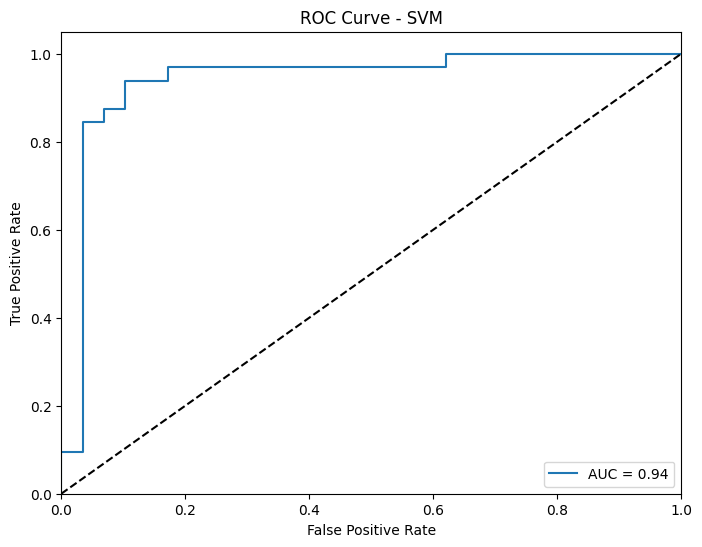

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/heart_disease (3).csv') #loading data csv file
print(data.isnull().sum()) #checking for missing/null values
imputer = SimpleImputer(strategy='mean') #Impute ie, replacing with mean for numerical columns only.
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
scaler = StandardScaler() #Normalizing the dataset
scaled_data = scaler.fit_transform(imputed_data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

X = data.drop('target', axis=1) #Separate features and target
y = data['target']
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean') #checking for missing/null values once again after splitting
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = StandardScaler() #Normalizing the dataset once again after splitting
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled) # Make predictions

# Ensure y_test and y_pred_svm are numpy arrays
y_test = np.array(y_test)
y_pred_svm = np.array(y_pred_svm)

print("SVM Classification Report:") # Print classification report
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm) # Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm) # ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


Random Forest ML Model implementation

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64
0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



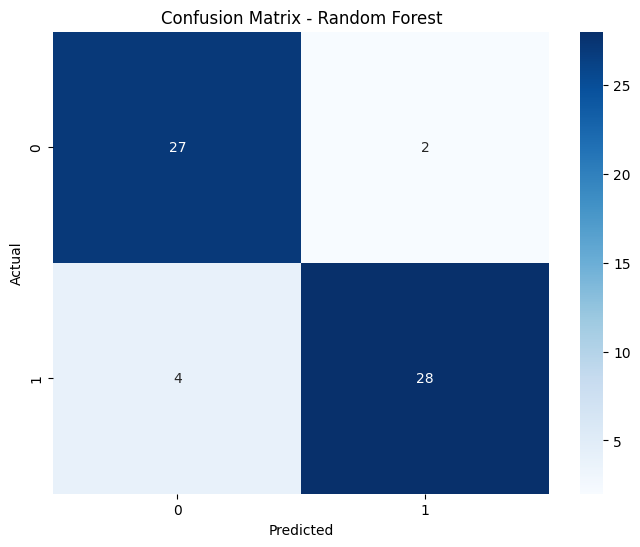

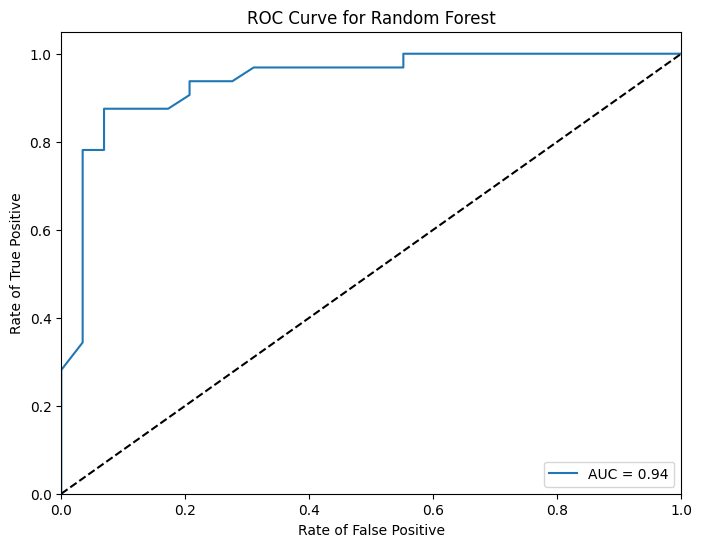

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

data = pd.read_csv('/content/heart_disease (3).csv') #loading data csv file
print(data.isnull().sum()) #checking for missing/null values
imputer = SimpleImputer(strategy='mean') #Impute ie, replacing with mean for numerical columns only.
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
scaler = StandardScaler() #Normalizing the dataset
scaled_data = scaler.fit_transform(imputed_data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

#For Random Forest ML Model, we shall now split the data for training (80%) and testing (20%)
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.isnull().sum()) #Checking for missing values once more.
print(y_train.isnull().sum())
scaler = StandardScaler() #Scaling features again
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#Now lets train the model, initialize and fit Random Forest model
model = RandomForestClassifier()
model.fit(scaled_X_train, y_train)  # Ensure you're using scaled data if scaling was applied
y_pred = model.predict(scaled_X_test)

#Now lets evaluate model performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, model.predict_proba(scaled_X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  #Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positive')
plt.ylabel('Rate of True Positive')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

Logistic Regression ML Model implementation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



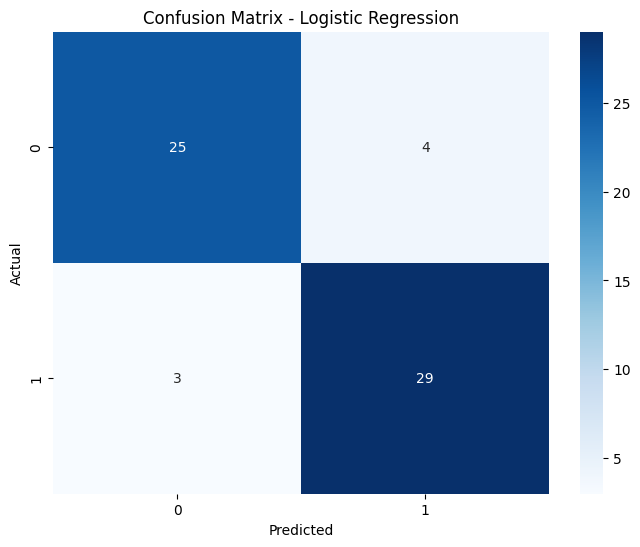

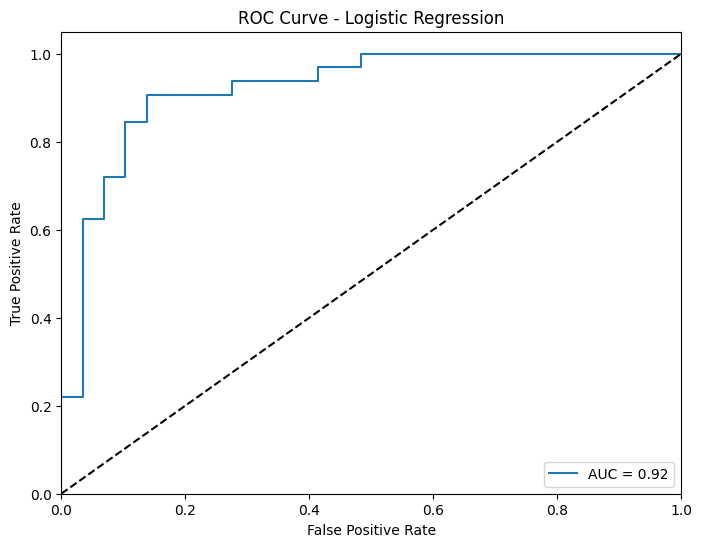

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/heart_disease.csv')  # Replace with your actual file path

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Ensure y_test and y_pred_logistic are numpy arrays
y_test = np.array(y_test)
y_pred_logistic = np.array(y_pred_logistic)

# Remove any potential NaN or infinite values
mask = ~(np.isnan(y_test) | np.isnan(y_pred_logistic) | np.isinf(y_test) | np.isinf(y_pred_logistic))
y_test = y_test[mask]
y_pred_logistic = y_pred_logistic[mask]

# Ensure both are integers
y_test = y_test.astype(int)
y_pred_logistic = y_pred_logistic.astype(int)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'AUC = {roc_auc_logistic:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


Support Vector Machines ML Model implemetation

Neural Networks ML Model Implementation

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



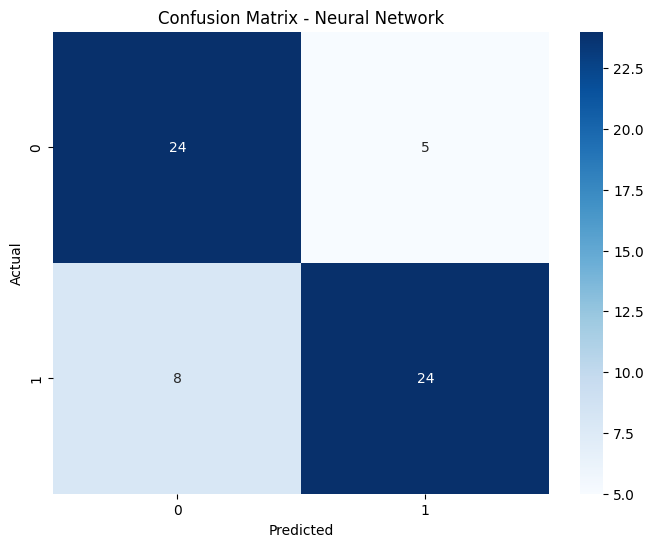

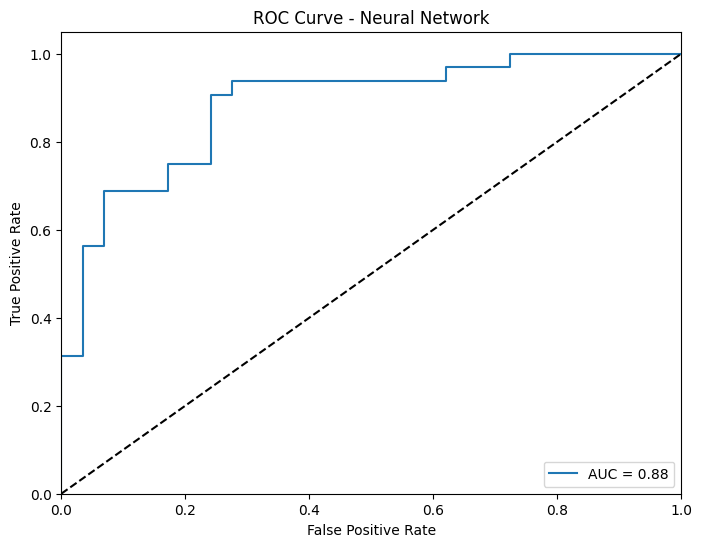

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/heart_disease.csv')  # Replace with your actual file path

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Ensure y_test and y_pred_nn are numpy arrays
y_test = np.array(y_test)
y_pred_nn = np.array(y_pred_nn)

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'AUC = {roc_auc_nn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()
